In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
# Create data

df = pd.DataFrame(
    [
        ['v2.8.0 (threaded) on 1 HPC node [reference]', 1.0, 'area_statistics', '0:01:13.376243'],
        ['v2.8.0 (threaded) on 1 HPC node [reference]', 1.0, 'climate_statistics', '0:00:53.622866'],
        ['v2.8.0 (threaded) on 1 HPC node [reference]', 1.0, 'regrid', '0:00:54.278396'],
        ['v2.8.0 (threaded) on 1 HPC node [reference]', 1.0, 'extract_levels', '0:27:08.828873'],
        ['v2.8.0 (threaded) on 1 HPC node [reference]', 1.0, 'amplitude', '0:00:57.498253'],
        ['v2.11.0 (threaded) on 1 HPC node', 1.0, 'area_statistics', '0:01:23.767180'],
        ['v2.11.0 (threaded) on 1 HPC node', 1.0, 'climate_statistics', '0:00:57.259202'],
        ['v2.11.0 (threaded) on 1 HPC node', 1.0, 'regrid', '0:00:58.320266'],
        ['v2.11.0 (threaded) on 1 HPC node', 1.0, 'extract_levels', '0:17:06.314297'],
        ['v2.11.0 (threaded) on 1 HPC node', 1.0, 'amplitude', '0:00:56.564116'],
        ['v2.11.0 (distributed) on 1 HPC node', 1.0, 'area_statistics', '0:00:41.996191'],
        ['v2.11.0 (distributed) on 1 HPC node', 1.0, 'climate_statistics', '0:00:21.041663'],
        ['v2.11.0 (distributed) on 1 HPC node', 1.0, 'regrid', '0:00:22.652803'],
        ['v2.11.0 (distributed) on 1 HPC node', 1.0, 'extract_levels', '0:00:32.752940'],
        ['v2.11.0 (distributed) on 1 HPC node', 1.0, 'amplitude', '0:00:22.781344'],
    ],
    columns=['setup', 'n_nodes', 'preprocessor', 'clocktime'],
)
df['clocktime'] = pd.to_timedelta(df['clocktime'])
df['runtime'] = df['clocktime'].dt.total_seconds()
ref_setup = 'v2.8.0 (threaded) on 1 HPC node [reference]'
for preprocessor in df['preprocessor'].unique():
    idx = df['preprocessor'] == preprocessor
    ref_idx = (df['setup'] == ref_setup) & idx
    ref_runtime = df.loc[ref_idx, 'runtime'].values.squeeze()
    ref_n_nodes = df.loc[ref_idx, 'n_nodes'].values.squeeze()
    df.loc[idx, 'speedup'] = ref_runtime / df.loc[idx, 'runtime']
    df.loc[idx, 'efficiency'] = df.loc[idx, 'speedup'] / df.loc[idx, 'n_nodes'] * ref_n_nodes
df

,setup,n_nodes,preprocessor,clocktime,runtime,speedup,efficiency
0,v2.8.0 (threaded) on 1 HPC node [reference],1.0,area_statistics,0 days 00:01:13.376243,73.376243,1.000000,1.000000
1,v2.8.0 (threaded) on 1 HPC node [reference],1.0,climate_statistics,0 days 00:00:53.622866,53.622866,1.000000,1.000000
2,v2.8.0 (threaded) on 1 HPC node [reference],1.0,regrid,0 days 00:00:54.278396,54.278396,1.000000,1.000000
3,v2.8.0 (threaded) on 1 HPC node [reference],1.0,extract_levels,0 days 00:27:08.828873,1628.828873,1.000000,1.000000
4,v2.8.0 (threaded) on 1 HPC node [reference],1.0,amplitude,0 days 00:00:57.498253,57.498253,1.000000,1.000000
5,v2.11.0 (threaded) on 1 HPC node,1.0,area_statistics,0 days 00:01:23.767180,83.767180,0.875955,0.875955
6,v2.11.0 (threaded) on 1 HPC node,1.0,climate_statistics,0 days 00:00:57.259202,57.259202,0.936493,0.936493
7,v2.11.0 (threaded) on 1 HPC node,1.0,regrid,0 days 00:00:58.320266,58.320266,0.930695,0.930695
8,v2.11.0 (threaded) on 1 HPC node,1.0,extract_levels,0 days 00:17:06.314297,1026.314297,1.587066,1.587066
9,v2.11.0 (threaded) on 1 HPC node,1.0,amplitude,0 days 00:00:56.564116,56.564116,1.016515,1.016515


In [5]:
PALETTE = [
    'firebrick',
    'darkorange',
    'royalblue',
]

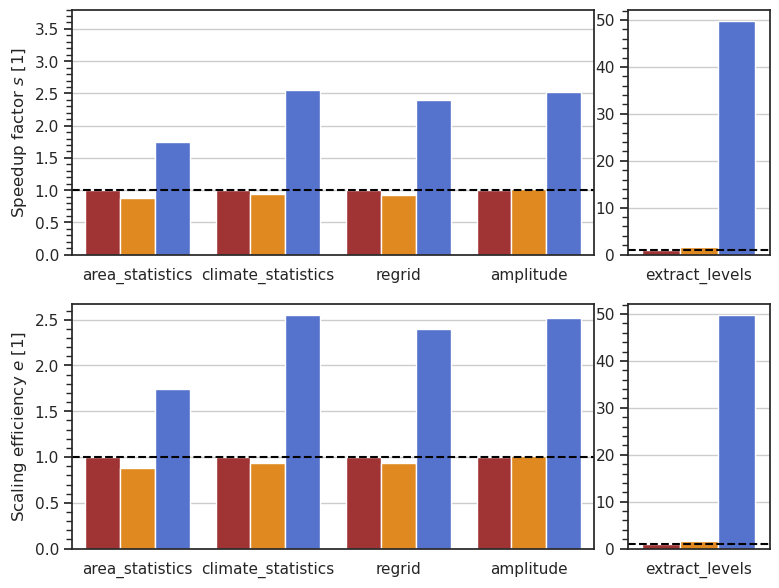

In [6]:
# Create plot
sns.set_theme(
    style='ticks',
    rc={
        'axes.grid': True,
        'xtick.bottom': False,
        'ytick.minor.visible': True,
    },
)

fig = plt.figure(figsize=(9, 7))
gs = GridSpec(2, 24, figure=fig)

df1 = df[df['preprocessor'] != 'extract_levels']
df2 = df[df['preprocessor'] == 'extract_levels']

ax_top_left = fig.add_subplot(gs[0, 0:18])
ax_top_right = fig.add_subplot(gs[0, 19:24])
ax_bottom_left = fig.add_subplot(gs[1, 0:18], sharex=ax_top_left)
ax_bottom_right = fig.add_subplot(gs[1, 19:24], sharex=ax_top_right)

sns.barplot(df1, x='preprocessor', y='speedup', hue='setup', legend=False, palette=PALETTE, ax=ax_top_left)
sns.barplot(df2, x='preprocessor', y='speedup', hue='setup', legend=False, palette=PALETTE, ax=ax_top_right)
sns.barplot(df1, x='preprocessor', y='efficiency', hue='setup', legend=False, palette=PALETTE, ax=ax_bottom_left)
sns.barplot(df2, x='preprocessor', y='efficiency', hue='setup', legend=False, palette=PALETTE, ax=ax_bottom_right)

ax_top_left.set_ylabel('Speedup factor $s$ [1]')
ax_top_left.set_ylim(0.0, 3.8)
ax_bottom_left.set_ylabel('Scaling efficiency $e$ [1]')
ax_top_right.set_ylabel(None)
ax_bottom_right.set_ylabel(None)

for ax in fig.axes:
    ax.set_xlabel(None)
    ax.axhline(1.0, color='black', linestyle='dashed')
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis='y', which='minor', left=True)
    # ax.label_outer()

plt.savefig(
    'single_preprocessors.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight',
)

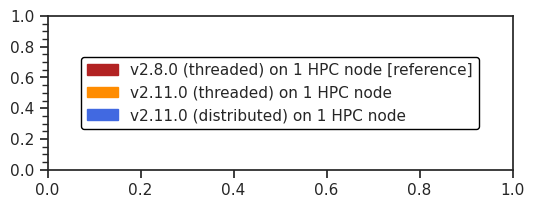

In [7]:
# legend
sns.set_theme(
    style='ticks',
    rc={
        'axes.grid': False,
        'figure.figsize':(5, 5),
    },
)

plt.figure(figsize=(6, 2))

patches = [
    mpatches.Patch(color=PALETTE[0], label='v2.8.0 (threaded) on 1 HPC node [reference]'),
    mpatches.Patch(color=PALETTE[1], label='v2.11.0 (threaded) on 1 HPC node'),
    mpatches.Patch(color=PALETTE[2], label='v2.11.0 (distributed) on 1 HPC node'),
]
legend = plt.legend(handles=patches, loc='center', edgecolor="black")
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.0))

plt.savefig(
    'legend.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)